In [8]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd

#1.	Read the data from the CSV file into a DataFrame (5 rows) 
data = pd.read_csv("exams.csv")
data.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
#2.	Display the basic information 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [7]:
#3.	Display statistical information (Math score / Reading score / Writing score)
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [10]:
data.groupby("race/ethnicity").mean(numeric_only = True)

,math score,reading score,writing score
race/ethnicity,,,
group A,61.629213,64.674157,62.674157
group B,63.452632,67.352632,65.600000
group C,64.463950,69.103448,67.827586
group D,67.362595,70.030534,70.145038
group E,73.821429,73.028571,71.407143


In [14]:
#Display a single column as a DataFrame with bracket notation.
single_col_bra=data[["math score"]]
single_col_bra


,math score
0,72
1,69
2,90
3,47
4,76
...,...
995,88
996,62
997,59
998,68


In [15]:
#Display a single column as a Series with bracket notation
single_col_bra=data["math score"]
single_col_bra

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math score, Length: 1000, dtype: int64

In [19]:
#Display a single column as a Series with dot notation.
data1 = data.rename(columns = {"math score":"math_score"})
single_col_bra=data1.math_score
single_col_bra

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

In [22]:
#Display only rows for females with a math score greater than or equal to 90.
data_female = data[(data["gender"] == "female" ) & (data["math score"] > 60)]
data_female

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
...,...,...,...,...,...,...,...,...
991,female,group B,some high school,standard,completed,65,82,78
993,female,group D,bachelor's degree,free/reduced,none,62,72,74
995,female,group E,master's degree,standard,completed,88,99,95
998,female,group D,some college,standard,completed,68,78,77


In [68]:
#1)Does taking a test preparation course improve average scores? 
data.groupby("test preparation course").mean(numeric_only= True)

,math score,reading score,writing score
test preparation course,,,
completed,69.695531,73.893855,74.418994
none,64.077882,66.534268,64.504673


In [73]:
#2)Which gender is better on average at math?  
data_gender = data.groupby("gender").mean(numeric_only = True)
data_gender 

,math score,reading score,writing score
gender,,,
female,63.633205,72.608108,72.467181
male,68.728216,65.473029,63.311203


In [81]:
#3)Which gender is better on average at all three subjects? Hint: Start by adding a column to the DataFrame with the total score?
data_gender = data_gender.rename(columns={"math score": "math_score","reading score": "reading_score","writing score": "writing_score"})
data_gender["Total Score"] = (data_gender["math_score"] + data_gender["reading_score"] + data_gender["writing_score"])
data_gender

,math_score,reading_score,writing_score,Total Score
gender,,,,
female,63.633205,72.608108,72.467181,208.708494
male,68.728216,65.473029,63.311203,197.512448


In [96]:
#4)Does the parents’ level of education influence the average scores? 
data["Total average"] =  (data["math score"] + data["reading score"] + data["writing score"])
data.groupby("parental level of education").mean(numeric_only = True)

,math score,reading score,writing score,Total average
parental level of education,,,,
associate's degree,67.882883,70.927928,69.896396,208.707207
bachelor's degree,69.389831,73.000000,73.381356,215.771186
high school,62.137755,64.704082,62.448980,189.290816
master's degree,69.745763,75.372881,75.677966,220.796610
some college,67.128319,69.460177,68.840708,205.429204
some high school,63.497207,66.938547,64.888268,195.324022


<Axes: >

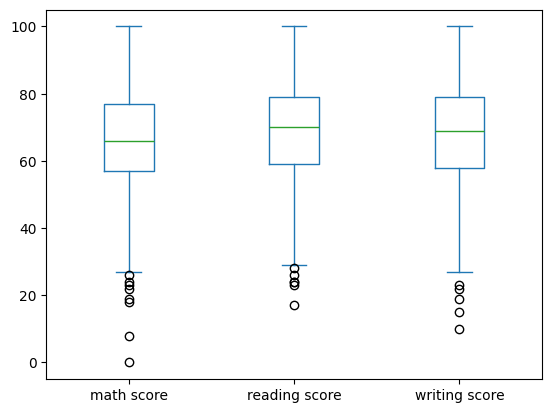

In [29]:
#Use the pandas plot() method to create a box plot.
data.plot.box()

<Axes: title={'center': 'Correlation between Math and Reading score'}, xlabel='math score', ylabel='reading score'>

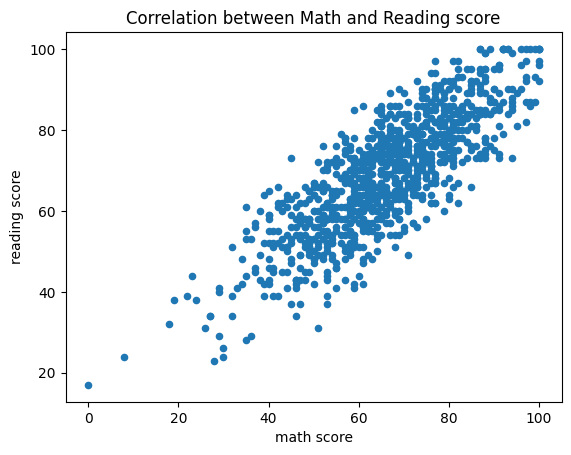

In [38]:
#Use the pandas plot() method to create a scatter plot like the one that follows.
data.plot.scatter(x = "math score", y = "reading score", title = "Correlation between Math and Reading score")

In [34]:
# Group the data by the gender column and calculate the average scores. Then create a bar plot.
data_group = data.groupby("gender").mean(numeric_only = True)
data_group

,math score,reading score,writing score
gender,,,
female,63.633205,72.608108,72.467181
male,68.728216,65.473029,63.311203


<Axes: title={'center': 'Score average by gender'}, xlabel='gender', ylabel='Score'>

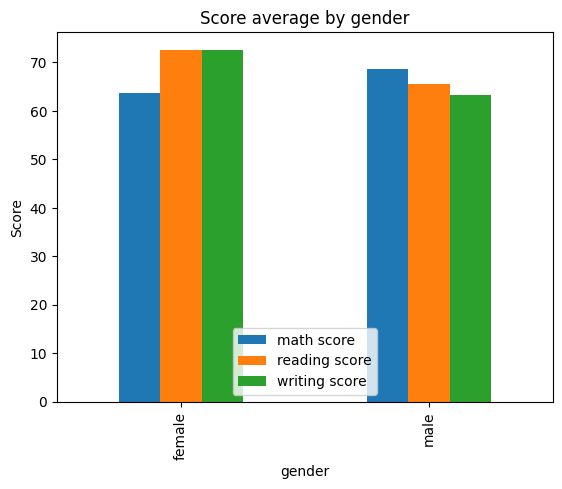

In [37]:
data_group.plot.bar(ylabel = "Score", title = "Score average by gender")

In [41]:
# What is the relationship between the reading score and the writing score?
data_group.corr()

,math score,reading score,writing score
math score,1.0,-1.0,-1.0
reading score,-1.0,1.0,1.0
writing score,-1.0,1.0,1.0


<Axes: xlabel='reading score', ylabel='writing score'>

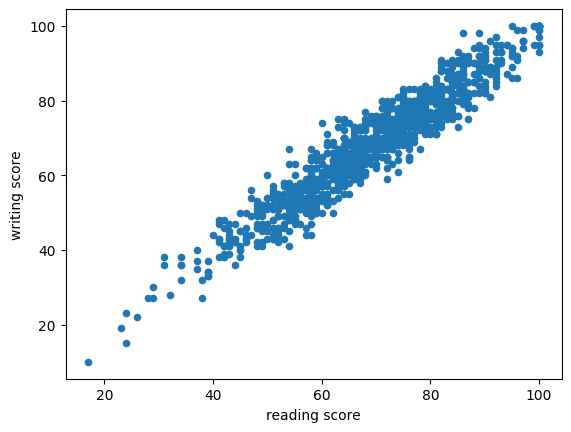

In [42]:
data.plot.scatter(x = "reading score", y = "writing score")

In [52]:
# Does the type of lunch appear to influence the average test scores?
data_lunch = data.groupby("lunch").mean(numeric_only = True)
data_lunch

,math score,reading score,writing score
lunch,,,
free/reduced,58.921127,64.653521,63.022535
standard,70.034109,71.654264,70.823256


In [66]:
#Use the Seaborn catplot() method to create a plot like the one below. (Vertical bar plot hue by level of education) 
#Rotate the x labels for the above plot to make them readable.
data.groupby("parental level of education").mean(numeric_only = True)

,math score,reading score,writing score
parental level of education,,,
associate's degree,67.882883,70.927928,69.896396
bachelor's degree,69.389831,73.000000,73.381356
high school,62.137755,64.704082,62.448980
master's degree,69.745763,75.372881,75.677966
some college,67.128319,69.460177,68.840708
some high school,63.497207,66.938547,64.888268


([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'some college'),
  Text(1, 0, "associate's degree"),
  Text(2, 0, 'high school'),
  Text(3, 0, 'some high school'),
  Text(4, 0, "bachelor's degree"),
  Text(5, 0, "master's degree")])

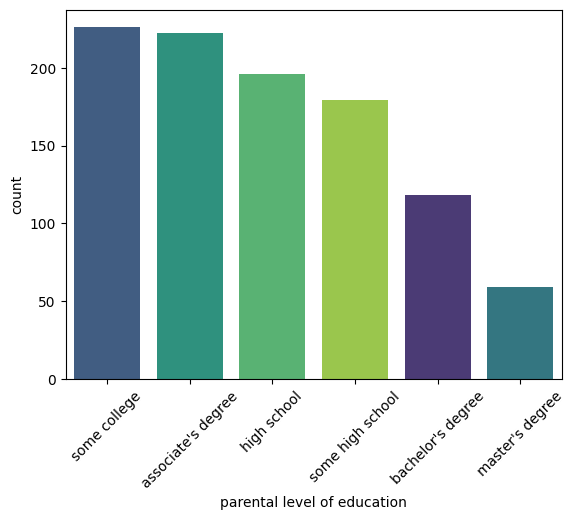

In [99]:
import seaborn as sns
sns.countplot(data = data, x = "parental level of education", hue='parental level of education', order=data['parental level of education'].value_counts().index,palette='viridis')
plt.xticks(rotation=45)

Text(0.5, 1.0, 'Writing vs Reading score')

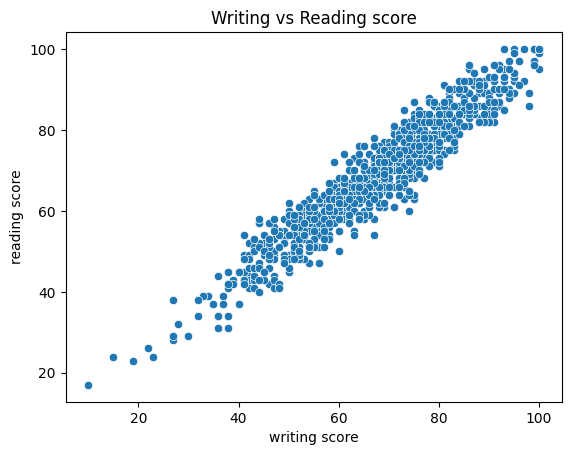

In [106]:
# Create a scatter plot with a specific method that compares the writing score with the reading score.
sns.scatterplot(data = data, x = "writing score", y = "reading score")
plt.title("Writing vs Reading score") 

Text(0.5, 1.0, 'Writing vs Reading score')

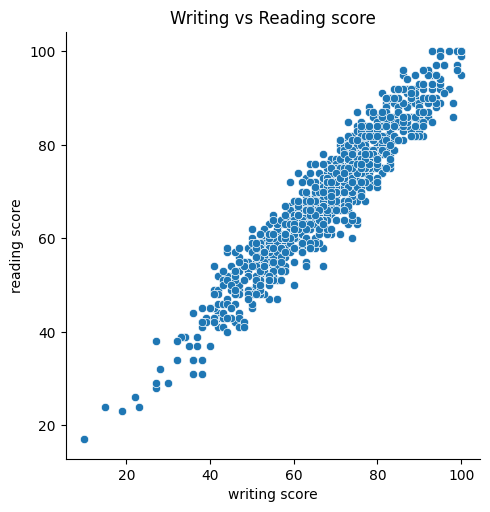

In [110]:
# Create the same plot with a general method. 
sns.relplot(data= data, x = "writing score", y = "reading score", kind = "scatter") 
plt.title("Writing vs Reading score") 

Text(0.5, 1.0, 'Writing vs Reading score')

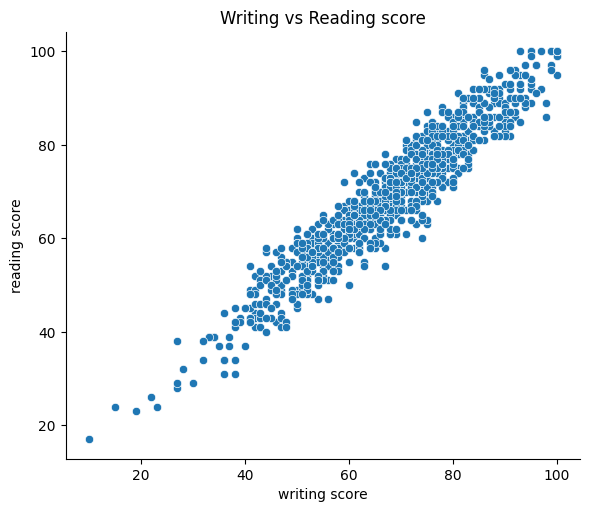

In [123]:
# Adjust the size of the scatter plot you created with the general method.(it is more like the size of the scatter plot with the specific method.)
sns.relplot(data= data, x = "writing score", y = "reading score", kind = "scatter", height=5, aspect= 1.2) 
plt.title("Writing vs Reading score") 